# EDA: Exploratory Data Analysis 

Dataset: https://projects.fivethirtyeight.com/coronavirus-polls/

In [1]:
# Importing the libraries for analysis: 

import pandas as pd
import datetime
import numpy as np  


# For Creating labelEncoder
# Import LabelEncoder:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# For Visualisation: 

import matplotlib.pyplot as plt  
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

In [2]:
data = pd.read_csv('covid_approval_polls_adjusted.csv')

# 1) Understanding the Data

In [3]:
data.shape

(1098, 19)

In [4]:
data.head()

,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,influence,multiversions,tracking,approve,disapprove,approve_adjusted,disapprove_adjusted,timestamp,url
0,Trump,6/26/2020,D,2/2/2020,2/4/2020,YouGov,B,523.0,a,0.542239,0.0,NaN,NaN,21.0,51.0,20.419717,52.935511,19:05:07 26 Jun 2020,https://d25d2506sfb94s.cloudfront.net/cumulus_...
1,Trump,6/26/2020,D,2/7/2020,2/9/2020,Morning Consult,B/C,817.0,a,0.592100,0.0,NaN,NaN,37.0,37.0,35.962734,40.621814,19:05:07 26 Jun 2020,https://morningconsult.com/wp-content/uploads/...
2,Trump,6/26/2020,D,2/9/2020,2/11/2020,YouGov,B,510.0,a,0.448718,0.0,NaN,NaN,19.0,50.0,18.419717,51.935511,19:05:07 26 Jun 2020,https://d25d2506sfb94s.cloudfront.net/cumulus_...
3,Trump,6/26/2020,D,2/16/2020,2/18/2020,YouGov,B,529.0,a,0.393155,0.0,NaN,NaN,11.0,59.0,10.419717,60.935511,19:05:07 26 Jun 2020,https://d25d2506sfb94s.cloudfront.net/cumulus_...
4,Trump,6/26/2020,D,2/23/2020,2/25/2020,YouGov,B,525.0,a,0.342849,0.0,NaN,NaN,14.0,56.0,13.419717,57.935511,19:05:07 26 Jun 2020,https://d25d2506sfb94s.cloudfront.net/cumulus_...


In [5]:
data.tail()

,subject,modeldate,party,startdate,enddate,pollster,grade,samplesize,population,weight,influence,multiversions,tracking,approve,disapprove,approve_adjusted,disapprove_adjusted,timestamp,url
1093,Trump,6/26/2020,all,6/19/2020,6/21/2020,Morning Consult,B/C,1988.0,rv,0.459313,0.354731,NaN,NaN,34.00,60.00,34.293085,62.192137,19:05:12 26 Jun 2020,https://www.politico.com/f/?id=00000172-e2ee-d...
1094,Trump,6/26/2020,all,6/21/2020,6/23/2020,YouGov,B,1500.0,a,0.488004,0.421632,NaN,NaN,39.00,51.00,39.864475,52.916041,19:05:12 26 Jun 2020,https://docs.cdn.yougov.com/cjd35jrh5o/econTab...
1095,Trump,6/26/2020,all,6/23/2020,6/23/2020,Data for Progress,B-,855.0,a,0.814090,0.745987,NaN,NaN,45.56,50.02,45.077979,51.035797,19:05:12 26 Jun 2020,https://docs.google.com/spreadsheets/d/1jqgTFa...
1096,Trump,6/26/2020,all,6/22/2020,6/23/2020,Ipsos,B-,1115.0,a,0.401777,0.365841,NaN,NaN,37.00,58.00,38.114343,57.328099,19:05:12 26 Jun 2020,https://www.reuters.com/article/us-usa-electio...
1097,Trump,6/26/2020,all,6/24/2020,6/25/2020,YouGov,B,1507.0,a,0.572259,0.572259,NaN,NaN,39.00,55.00,39.864475,56.916041,19:05:12 26 Jun 2020,https://docs.cdn.yougov.com/ove5ckbw84/2020062...


In [6]:
data.dtypes

subject                 object
modeldate               object
party                   object
startdate               object
enddate                 object
pollster                object
grade                   object
samplesize             float64
population              object
weight                 float64
influence              float64
multiversions           object
tracking                object
approve                float64
disapprove             float64
approve_adjusted       float64
disapprove_adjusted    float64
timestamp               object
url                     object
dtype: object

In [7]:
data.describe()

,samplesize,weight,influence,approve,disapprove,approve_adjusted,disapprove_adjusted
count,1098.000000,1098.000000,1098.000000,1095.000000,1088.000000,1095.000000,1088.000000
mean,878.887326,0.408314,0.037429,46.122630,48.686526,46.264980,49.099045
std,1401.981633,0.399891,0.127733,24.483098,24.220839,24.675974,24.442748
min,36.776667,0.026698,0.000000,3.490000,2.000000,4.657495,3.215145
25%,279.000000,0.165270,0.000000,30.000000,32.750000,31.262273,35.236112
50%,501.500000,0.267761,0.000000,43.000000,51.000000,43.114343,51.489863
75%,1000.000000,0.526753,0.007713,55.000000,62.050000,53.578780,62.336705
max,22921.000000,2.621377,2.112405,95.000000,96.510000,94.371838,94.017523


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 19 columns):
subject                1098 non-null object
modeldate              1098 non-null object
party                  1098 non-null object
startdate              1098 non-null object
enddate                1098 non-null object
pollster               1098 non-null object
grade                  811 non-null object
samplesize             1098 non-null float64
population             1098 non-null object
weight                 1098 non-null float64
influence              1098 non-null float64
multiversions          4 non-null object
tracking               234 non-null object
approve                1095 non-null float64
disapprove             1088 non-null float64
approve_adjusted       1095 non-null float64
disapprove_adjusted    1088 non-null float64
timestamp              1098 non-null object
url                    1098 non-null object
dtypes: float64(7), object(12)
memory usage: 163.1+ KB


# 2) Cleaning the data

['party', 'pollster', 'samplesize', 'population', 'weight', 'influence',
       'approve', 'disapprove', 'approve_adjusted', 'disapprove_adjusted',
       'grade_binary']

data.columns

In [9]:
#Dropping Unnecessary Columns:

data = data.drop(['subject', 'modeldate', 'startdate', 'enddate',
          'multiversions', 'tracking', 'timestamp','url'], axis=1)

In [10]:
data.head()

,party,pollster,grade,samplesize,population,weight,influence,approve,disapprove,approve_adjusted,disapprove_adjusted
0,D,YouGov,B,523.0,a,0.542239,0.0,21.0,51.0,20.419717,52.935511
1,D,Morning Consult,B/C,817.0,a,0.592100,0.0,37.0,37.0,35.962734,40.621814
2,D,YouGov,B,510.0,a,0.448718,0.0,19.0,50.0,18.419717,51.935511
3,D,YouGov,B,529.0,a,0.393155,0.0,11.0,59.0,10.419717,60.935511
4,D,YouGov,B,525.0,a,0.342849,0.0,14.0,56.0,13.419717,57.935511


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1098 entries, 0 to 1097
Data columns (total 11 columns):
party                  1098 non-null object
pollster               1098 non-null object
grade                  811 non-null object
samplesize             1098 non-null float64
population             1098 non-null object
weight                 1098 non-null float64
influence              1098 non-null float64
approve                1095 non-null float64
disapprove             1088 non-null float64
approve_adjusted       1095 non-null float64
disapprove_adjusted    1088 non-null float64
dtypes: float64(7), object(4)
memory usage: 94.5+ KB


# Dealing with missing values:

Our dataset has 11 columns of which we have 4 categorical attributes,

a) First need to convert categorical variables into binary attributes,

b) Need to deal with missing values in columns: 
 -  "grade",
 -  "approve",
 -  "disapprove",
 -  "approve_adjusted",
 -  "disapprove_adjusted"

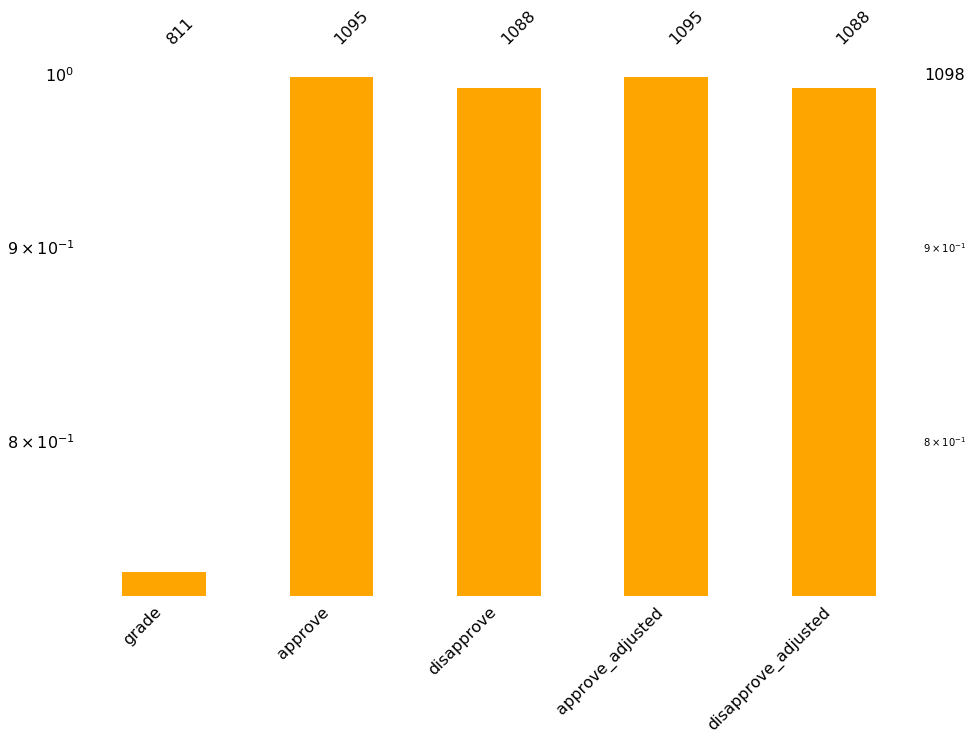

In [12]:
#Visualising Missing Values:
import missingno as msno
missing_data = data.columns[data.isnull().any()].tolist()
msno.bar(data[missing_data], color="orange", log=True, figsize=(15,10))

In [13]:
data.isnull().sum()

party                    0
pollster                 0
grade                  287
samplesize               0
population               0
weight                   0
influence                0
approve                  3
disapprove              10
approve_adjusted         3
disapprove_adjusted     10
dtype: int64

In [14]:
# a) First need to convert categorical variables into binary attributes:

# Let us create a dictionary:

grade_dict = {'A+':1, 'A':2, 'A-':3, 'B+':4, 'B':5,'B-':6, 'C+':7, 'C':8,
              'C-':9, 'D+':10, 'D':11, 'D-':12,'A/B':13, 'B/C':14, 'C/D':15}

# Adding a new column: 'grade_binary'
data['grade_binary'] = data['grade'].map(grade_dict)

# Dropping the "grade" column:
data = data.drop(['grade'], axis=1)

#creating label encoding: 
data['party'] = le.fit_transform(data['party'])
data['pollster'] = le.fit_transform(data['pollster'])
data['grade_binary'] = le.fit_transform(data['grade_binary'])
data['population'] = le.fit_transform(data['population'])

# rearranging the columns in the data set:
data = data[['party',  'population','grade_binary','influence','pollster', 'samplesize', 'weight',
             'approve', 'disapprove', 'approve_adjusted', 'disapprove_adjusted']]

In [15]:
data.head()

,party,population,grade_binary,influence,pollster,samplesize,weight,approve,disapprove,approve_adjusted,disapprove_adjusted
0,0,0,4,0.0,42,523.0,0.542239,21.0,51.0,20.419717,52.935511
1,0,0,11,0.0,24,817.0,0.592100,37.0,37.0,35.962734,40.621814
2,0,0,4,0.0,42,510.0,0.448718,19.0,50.0,18.419717,51.935511
3,0,0,4,0.0,42,529.0,0.393155,11.0,59.0,10.419717,60.935511
4,0,0,4,0.0,42,525.0,0.342849,14.0,56.0,13.419717,57.935511


In [16]:
# b) Dealing with missing values:

data[['grade_binary', 'approve', 'disapprove', 'approve_adjusted', 'disapprove_adjusted']] = data[['grade_binary', 'approve', 'disapprove', 'approve_adjusted', 'disapprove_adjusted']].fillna(0)

In [17]:
data.head()

,party,population,grade_binary,influence,pollster,samplesize,weight,approve,disapprove,approve_adjusted,disapprove_adjusted
0,0,0,4,0.0,42,523.0,0.542239,21.0,51.0,20.419717,52.935511
1,0,0,11,0.0,24,817.0,0.592100,37.0,37.0,35.962734,40.621814
2,0,0,4,0.0,42,510.0,0.448718,19.0,50.0,18.419717,51.935511
3,0,0,4,0.0,42,529.0,0.393155,11.0,59.0,10.419717,60.935511
4,0,0,4,0.0,42,525.0,0.342849,14.0,56.0,13.419717,57.935511


# 3) Understanding the Statistical summary

In [18]:
data.describe()

,party,population,grade_binary,influence,pollster,samplesize,weight,approve,disapprove,approve_adjusted,disapprove_adjusted
count,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000,1098.000000
mean,1.577413,0.704007,45.414390,0.037429,24.174863,878.887326,0.408314,45.996612,48.243115,46.138573,48.651877
std,1.141701,0.937812,78.341168,0.127733,12.767339,1401.981633,0.399891,24.567957,24.550200,24.760373,24.774525
min,0.000000,0.000000,0.000000,0.000000,0.000000,36.776667,0.026698,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,4.000000,0.000000,15.000000,279.000000,0.165270,30.000000,25.000000,30.668711,29.073563
50%,2.000000,0.000000,9.000000,0.000000,24.000000,501.500000,0.267761,43.000000,51.000000,43.114343,51.332402
75%,3.000000,2.000000,24.750000,0.007713,39.000000,1000.000000,0.526753,54.750000,62.000000,53.281320,62.162494
max,3.000000,2.000000,299.000000,2.112405,43.000000,22921.000000,2.621377,95.000000,96.510000,94.371838,94.017523


In [19]:
data.columns

Index(['party', 'population', 'grade_binary', 'influence', 'pollster',
       'samplesize', 'weight', 'approve', 'disapprove', 'approve_adjusted',
       'disapprove_adjusted'],
      dtype='object')

# 4) Data Visulaisation

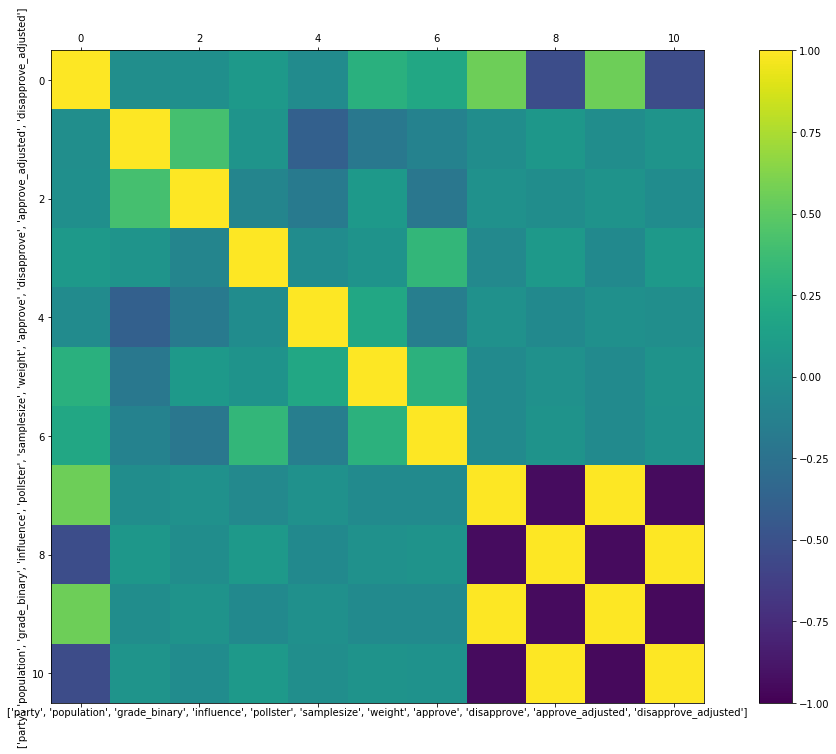

In [20]:
# Correlation matrix:

labels = ['party', 'population', 'grade_binary', 'influence', 'pollster',
          'samplesize', 'weight', 'approve', 'disapprove', 'approve_adjusted',
          'disapprove_adjusted']
correlations = data.corr()
# plot correlation matrix
fig = plt.figure(figsize=(20,12))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)#
ax.set_xlabel(labels)
ax.set_ylabel(labels)
plt.show()

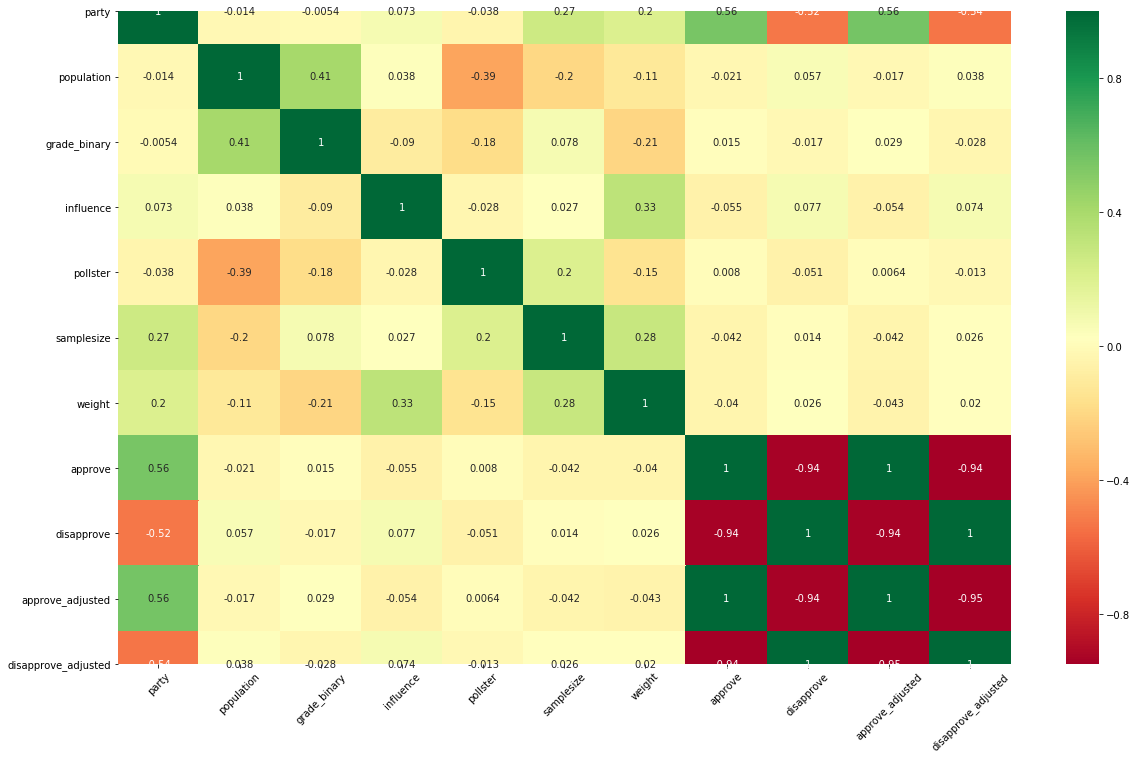

In [21]:
# Plotting the correlation matrix on a heatmap
fig, ax = plt.subplots(figsize=(20,12))
sns.heatmap(correlations,annot=True,cmap="RdYlGn")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);
plt.show()

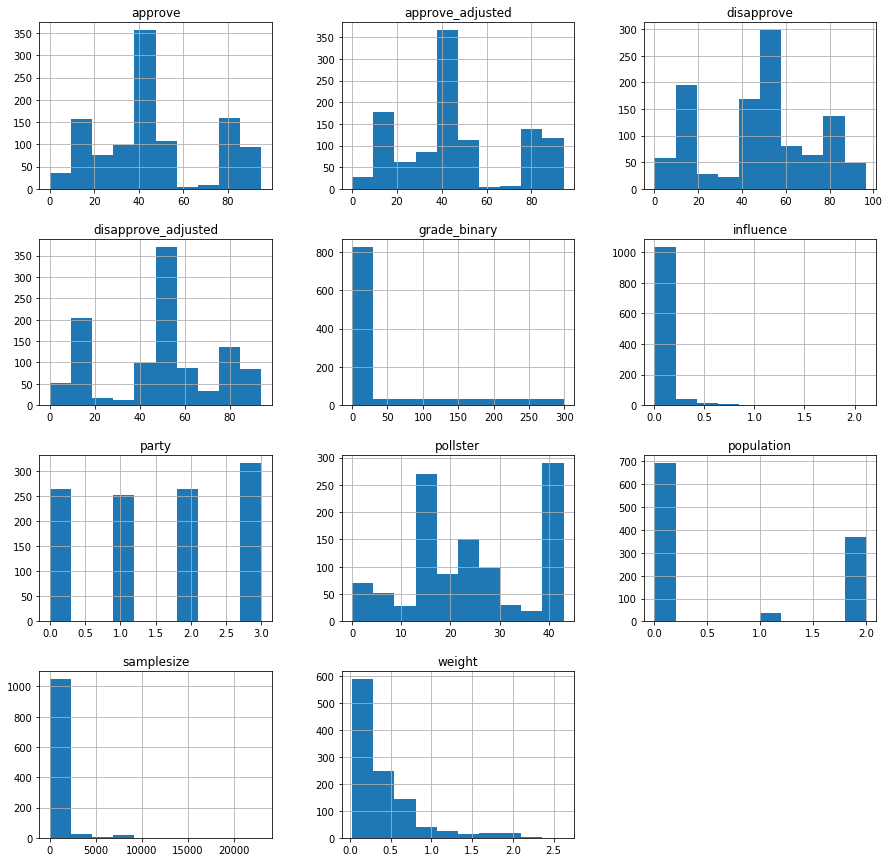

In [22]:
# Histogram
histogram = data.hist(figsize=(15, 15))

In [23]:
# Box Plot:
data1 = data[['pollster','grade_binary']]
data2 = data[['party', 'population', 'weight', 'influence']]
data3 = data[['approve', 'disapprove', 'approve_adjusted', 'disapprove_adjusted']]


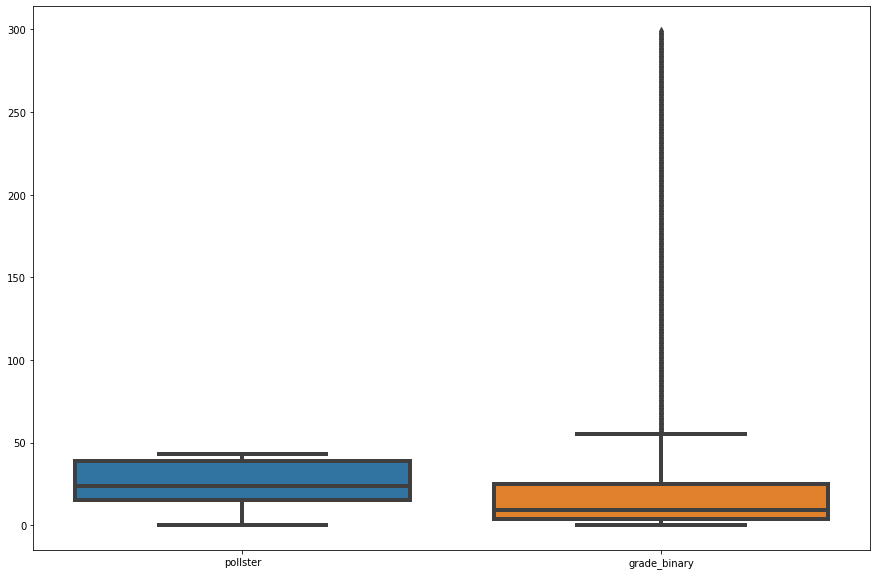

In [24]:
plt.figure(figsize=(15,10))
sns.boxplot(data= data1, linewidth=4)

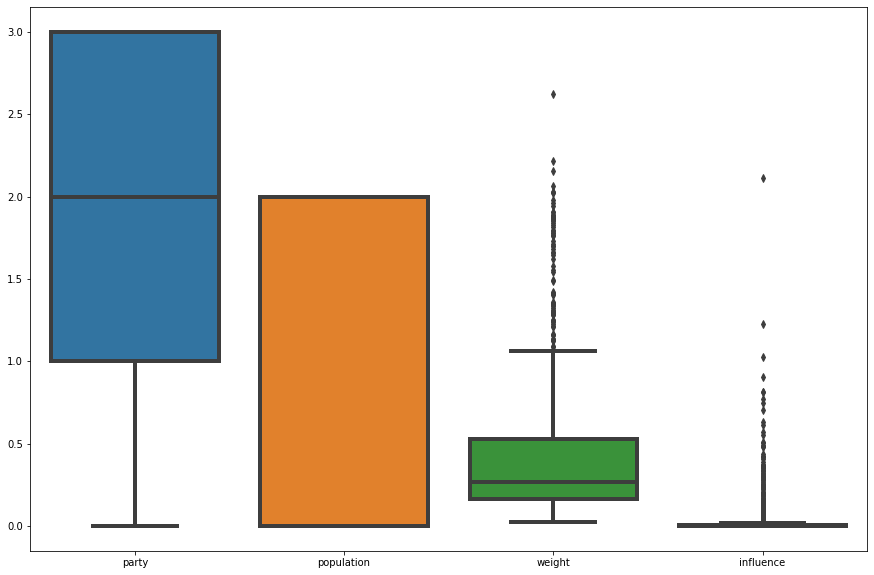

In [25]:
plt.figure(figsize=(15,10))
sns.boxplot(data= data2, linewidth=4)

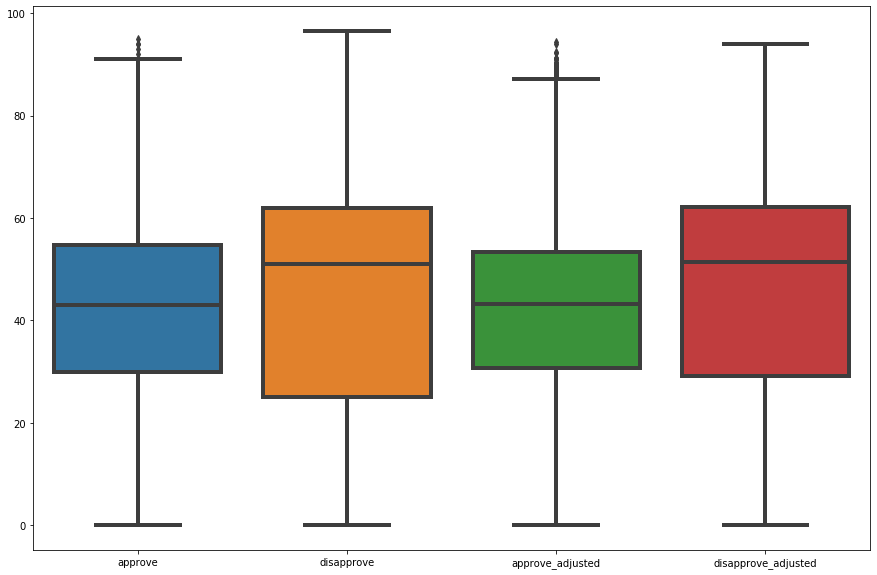

In [26]:
plt.figure(figsize=(15,10))
sns.boxplot(data= data3, linewidth=4)

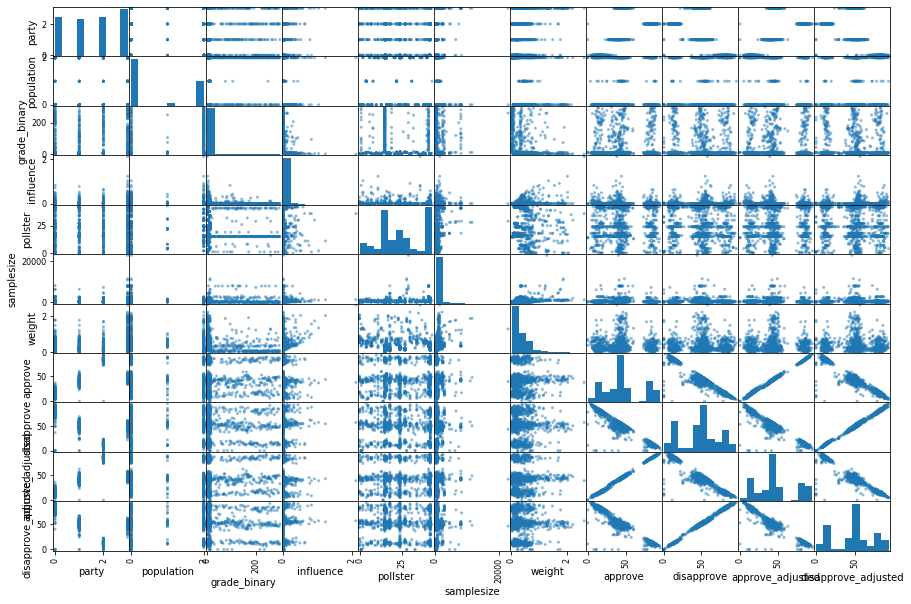

In [27]:
# Scatter Plot:

Scatter = scatter_matrix(data, figsize=(15,10), alpha=0.5)

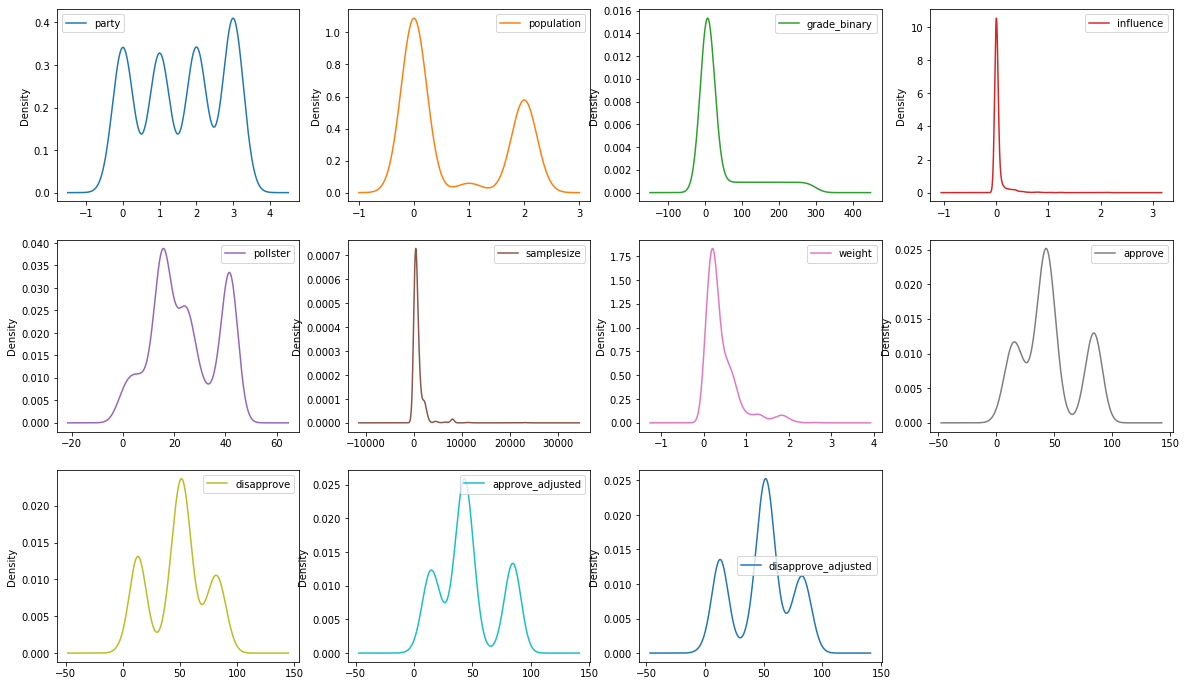

In [28]:
# Density Plot: 
K=data.plot(kind='density', figsize=(20,12), subplots=True,layout=(3,4),sharex=False,sharey=False)

# 5) Drawaing Infernce from the Data:

In [29]:
party = data.groupby('party')
party = party.mean()
party

,population,grade_binary,influence,pollster,samplesize,weight,approve,disapprove,approve_adjusted,disapprove_adjusted
party,,,,,,,,,,
0,0.704545,47.261364,0.031840,24.390152,638.889978,0.361842,15.756780,79.133447,15.246512,79.999467
1,0.735178,40.632411,0.028168,24.916996,510.277036,0.322857,39.893676,50.137945,40.362305,51.165789
2,0.704545,51.053030,0.027968,24.390152,520.946444,0.327345,83.541174,13.038561,84.005107,12.720264
3,0.678233,42.996845,0.057356,23.223975,1671.045358,0.582650,44.783975,50.323754,44.940259,50.463116


In [30]:
pollster = data.groupby('pollster')
pollster = pollster.mean()
pollster

,party,population,grade_binary,influence,samplesize,weight,approve,disapprove,approve_adjusted,disapprove_adjusted
pollster,,,,,,,,,,
0,1.500000,0.000000,0.000000,0.023675,492.741250,1.000818,47.875000,50.833333,47.051247,50.467028
1,1.615385,0.000000,145.923077,0.072354,587.649231,0.840484,41.692308,30.384615,43.439655,28.801095
2,1.500000,0.375000,4.000000,0.160554,523.062500,0.771876,43.750000,49.625000,44.573411,49.791092
3,3.000000,0.000000,11.000000,0.000000,1500.000000,1.250388,45.000000,55.000000,46.047135,52.301423
4,2.294118,1.000000,8.000000,0.023593,1041.580741,0.458978,44.900588,55.098824,45.385118,52.433629
5,1.500000,0.000000,11.000000,0.040836,747.250000,0.652127,43.500000,51.062500,44.669225,50.553749
6,1.500000,2.000000,152.250000,0.000000,958.500000,0.740814,48.500000,48.000000,47.851743,48.344052
7,1.666667,0.000000,5.000000,0.088755,565.111111,0.463643,47.195185,49.165185,46.808899,49.880844
8,3.000000,1.000000,152.000000,0.090786,920.200000,0.620579,46.400000,50.200000,46.030574,50.091839


In [31]:
grade= data.groupby('grade_binary')
grade = grade.mean()
grade

,party,population,influence,pollster,samplesize,weight,approve,disapprove,approve_adjusted,disapprove_adjusted
grade_binary,,,,,,,,,,
0,1.500000,0.357143,0.100034,14.642857,472.515893,0.993907,47.071429,49.982143,46.741206,49.777568
1,1.500000,0.400000,0.000000,38.600000,475.200000,0.831640,49.610000,44.855000,49.015877,45.664539
2,1.645161,1.935484,0.109835,13.645161,592.884839,1.007298,45.451613,49.822581,45.753016,49.573734
3,1.500000,2.000000,0.141571,30.000000,720.496875,1.073661,45.125000,51.187500,45.381537,50.439125
4,1.506224,0.024896,0.038227,37.900415,688.854772,0.303760,46.489627,45.746888,46.598260,47.697995
...,...,...,...,...,...,...,...,...,...,...
295,2.000000,2.000000,0.000000,15.000000,61.020000,0.038456,83.000000,14.000000,83.792585,13.292110
296,2.000000,0.000000,0.000000,41.000000,2300.000000,0.383244,88.000000,12.000000,90.253440,10.056447
297,3.000000,2.000000,0.000000,15.000000,167.833330,0.042000,48.000000,48.000000,48.377673,47.126989


In [32]:
population = data.groupby('population')
population = population.mean()
population

,party,grade_binary,influence,pollster,samplesize,weight,approve,disapprove,approve_adjusted,disapprove_adjusted
population,,,,,,,,,,
0,1.577201,22.041847,0.034075,28.102453,1090.675940,0.439007,46.371818,47.083781,46.445665,47.887381
1,2.027027,20.000000,0.028684,14.135135,799.888449,0.532260,46.548919,52.531892,46.428165,51.215758
2,1.532609,91.983696,0.044626,17.788043,487.999959,0.338052,45.234511,49.995109,45.531155,49.833758


In [33]:
corr = data.corr()
corr

,party,population,grade_binary,influence,pollster,samplesize,weight,approve,disapprove,approve_adjusted,disapprove_adjusted
party,1.000000,-0.013912,-0.005419,0.072580,-0.037702,0.268289,0.202503,0.556589,-0.524588,0.560850,-0.535419
population,-0.013912,1.000000,0.413603,0.037845,-0.386163,-0.201491,-0.114551,-0.021384,0.057337,-0.017130,0.037851
grade_binary,-0.005419,0.413603,1.000000,-0.089824,-0.178237,0.077544,-0.205391,0.014760,-0.017390,0.028670,-0.028044
influence,0.072580,0.037845,-0.089824,1.000000,-0.027652,0.027347,0.326078,-0.054722,0.076694,-0.054043,0.074111
pollster,-0.037702,-0.386163,-0.178237,-0.027652,1.000000,0.202886,-0.146289,0.007952,-0.050636,0.006440,-0.013413
samplesize,0.268289,-0.201491,0.077544,0.027347,0.202886,1.000000,0.284779,-0.041752,0.014117,-0.041808,0.025686
weight,0.202503,-0.114551,-0.205391,0.326078,-0.146289,0.284779,1.000000,-0.040000,0.026301,-0.043225,0.020115
approve,0.556589,-0.021384,0.014760,-0.054722,0.007952,-0.041752,-0.040000,1.000000,-0.935906,0.998479,-0.943278
disapprove,-0.524588,0.057337,-0.017390,0.076694,-0.050636,0.014117,0.026301,-0.935906,1.000000,-0.939919,0.997147
approve_adjusted,0.560850,-0.017130,0.028670,-0.054043,0.006440,-0.041808,-0.043225,0.998479,-0.939919,1.000000,-0.947963


In [34]:
# Saving the file as '.csv' for further analysis:
data.to_csv('data.csv')

In [35]:
data.head()

,party,population,grade_binary,influence,pollster,samplesize,weight,approve,disapprove,approve_adjusted,disapprove_adjusted
0,0,0,4,0.0,42,523.0,0.542239,21.0,51.0,20.419717,52.935511
1,0,0,11,0.0,24,817.0,0.592100,37.0,37.0,35.962734,40.621814
2,0,0,4,0.0,42,510.0,0.448718,19.0,50.0,18.419717,51.935511
3,0,0,4,0.0,42,529.0,0.393155,11.0,59.0,10.419717,60.935511
4,0,0,4,0.0,42,525.0,0.342849,14.0,56.0,13.419717,57.935511


# Saving the notebook as "html" or "py" file:

In [38]:
from notebooktoall.transform import transform_notebook
transform_notebook(ipynb_file="01. EDA - Rakshit Ratan-10542705.ipynb", export_list=["html", "py"])